In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import string
import random
import re
import requests
import os
import textwrap

In [ ]:
let1 = list(string.ascii_lowercase)
let2 = list(string.ascii_lowercase)

In [ ]:
true_map = {}
random.shuffle(let2)

In [ ]:
for k,v in zip(let1,let2):
  true_map[k] = v

In [ ]:
M = np.ones((26,26))
pi = np.zeros(26)

In [ ]:
def update_trans(ch1,ch2):
  M[ord(ch1)-97,ord(ch2)-97]+=1

In [ ]:
def update_pi(ch1):
  pi[ord(ch1)-97] += 1

In [ ]:
def get_word_prob(word):
  i = ord(word[0]) - 97
  logp = np.log(pi[i])
  for ch in word[1:]:
    j = ord(ch) - 97
    logp += np.log(M[i,j])
    i = j
  return logp

In [ ]:
def get_seq_prob(words):
  if type(words) == str:
    words = words.split()
  logp = 0
  for word in words:
    logp+= get_word_prob(word)
  return logp

In [ ]:
if not os.path.exists('moby_dick.txt'):
  print("Downloading moby dick...")
  r = requests.get('https://lazyprogrammer.me/course_files/moby_dick.txt')
  with open('moby_dick.txt', 'w') as f:
    f.write(r.content.decode())

In [ ]:
regex = re.compile('[^a-zA-Z]')

In [ ]:
for line in open('moby_dick.txt'):
  line = line.rstrip()
  if line:
    line = regex.sub(' ',line)
    tokens = line.lower().split()
    for token in tokens:
      ch0 = token[0]
      update_pi(ch0)

      for ch1 in token[1:]:
        update_trans(ch0,ch1)
        ch0 = ch1

In [ ]:
pi /= pi.sum()
M /= M.sum(axis=1,keepdims=True)

In [ ]:
og_message = '''Away they went, and I was just wondering whether I should not do well
to follow them when up the lane came a neat little landau, the coachman
with his coat only half-buttoned, and his tie under his ear, while all
the tags of his harness were sticking out of the buckles. It hadn't
pulled up before she shot out of the hall door and into it. I only
caught a glimpse of her at the moment, but she was a lovely woman, with
a face that a man might die for.
'''
og_meesgae2 = ''' then lounged down the street and found,
as I expected, that there was a mews in a lane which runs down
by one wall of the garden. I lent the ostlers a hand in rubbing
down their horses, and received in exchange twopence, a glass of
half-and-half, two fills of shag tobacco, and as much information
as I could desire about Miss Adler, to say nothing of half a dozen
other people in the neighbourhood in whom I was not in the least
interested, but whose biographies I was compelled to listen to.
'''

In [ ]:
def encode_msg(message):
  message = message.lower()
  message = regex.sub(' ',message)
  coded_msg = []
  for ch in message:
    coded_ch = ch
    if ch in true_map:
      coded_ch = true_map[ch]
    coded_msg.append(coded_ch)

  return ''.join(coded_msg)

In [ ]:
encoded_msg = encode_msg(og_message)


In [ ]:
def decode_msg(message, word_map):
  decoded_msg = []
  for ch in message:
    decoded_ch = ch
    if ch in word_map:
      decoded_ch = word_map[ch]
    decoded_msg.append(decoded_ch)
  return ''.join(decoded_msg)

In [ ]:
dna_pool= []
for _ in range(20):
  dna = list(string.ascii_lowercase)
  random.shuffle(dna)
  dna_pool.append(''.join(dna))


In [ ]:
def evolve(dna_pool,n_children):
  offspring = []
  for dna in dna_pool:
    for _ in range(20):
      copy = dna.copy()
      j = np.random.randint(len(copy))
      k = np.random.randint(len(copy))
      copy[j],copy[k] = copy[k],copy[j]
      offspring.append(copy)
  return offspring+dna_pool

In [ ]:
iters = 1000
scores = np.zeros(iters)
best_dna = None
best_map = None
best_score = float('-inf')
for i in range(iters):
  if i>0:
    dna_pool = evolve(dna_pool,3)
  dna2score = {}
  for dna in dna_pool:
    current_map = {}
    for k,v in zip(let1,dna):
      current_map[k] = v
    decoded_message = decode_msg(encoded_msg,current_map)
    score = get_seq_prob(decoded_message)
    dna2score[''.join(dna)] = score
    if score>best_score:
      best_dna = dna
      best_map = current_map
      best_score = score
  scores[i] = np.mean(list(dna2score.values()))
  sorted_dna = sorted(dna2score.items(),key=lambda x: x[1], reverse = True)
  dna_pool = [list(k) for k,v in sorted_dna[:5]]
  print("Iter: ",i,"score: ",scores[i],"best so far: ",best_score)

Iter:  0 score:  -1851.0372495884262 best so far:  -1522.7397055909935
Iter:  1 score:  -1678.6982610913933 best so far:  -1473.799322140318
Iter:  2 score:  -1527.930003154672 best so far:  -1392.5966540059399
Iter:  3 score:  -1472.5227055408257 best so far:  -1359.3306938583928
Iter:  4 score:  -1411.870215809511 best so far:  -1280.5367673933756
Iter:  5 score:  -1368.6315896206306 best so far:  -1245.3625802265292
Iter:  6 score:  -1307.8000489738215 best so far:  -1202.7149666347666
Iter:  7 score:  -1287.4214810679043 best so far:  -1188.2158653231877
Iter:  8 score:  -1254.795612116852 best so far:  -1163.6321186075504
Iter:  9 score:  -1246.86445561733 best so far:  -1148.680244434818
Iter:  10 score:  -1225.2612553405706 best so far:  -1122.9264697430579
Iter:  11 score:  -1202.4370411642915 best so far:  -1115.0745064625505
Iter:  12 score:  -1192.4702649062938 best so far:  -1100.8472628118711
Iter:  13 score:  -1175.3819082769396 best so far:  -1092.2655065679571
Iter:  14

In [ ]:
decoded_message = decode_msg(encoded_msg, best_map)
print("LL of decoded message: ", get_seq_prob(decoded_message))
print("LL of original message: ", get_seq_prob(regex.sub(' ',og_message.lower())))
for true, v in  true_map.items():
  pred = best_map[v]
  if true!=pred:
    print("True: ",true,"Pred: ",pred)

LL of decoded message:  -799.9598379791663
LL of original message:  -801.1864099411108
True:  j Pred:  q
True:  q Pred:  z
True:  x Pred:  j
True:  z Pred:  x


In [ ]:
decoded_message

'away they went  and i was qust wondering whether i should not do well to follow them when up the lane came a neat little landau  the coachman with his coat only half buttoned  and his tie under his ear  while all the tags of his harness were sticking out of the buckles  it hadn t pulled up before she shot out of the hall door and into it  i only caught a glimpse of her at the moment  but she was a lovely woman  with a face that a man might die for  '

In [ ]:
og_message

"Away they went, and I was just wondering whether I should not do well\nto follow them when up the lane came a neat little landau, the coachman\nwith his coat only half-buttoned, and his tie under his ear, while all\nthe tags of his harness were sticking out of the buckles. It hadn't\npulled up before she shot out of the hall door and into it. I only\ncaught a glimpse of her at the moment, but she was a lovely woman, with\na face that a man might die for.\n"

In [ ]:
encoded_msg

'gdgp ablp dloa  gok f dgv whva dnokltfoy dblablt f vbnhck ona kn dlcc an mnccnd ablr dblo hu abl cgol zgrl g olga cfaacl cgokgh  abl zngzbrgo dfab bfv znga nocp bgcm qhaanolk  gok bfv afl hoklt bfv lgt  dbfcl gcc abl agyv nm bfv bgtolvv dltl vafzifoy nha nm abl qhziclv  fa bgko a uhcclk hu qlmntl vbl vbna nha nm abl bgcc knnt gok foan fa  f nocp zghyba g ycfruvl nm blt ga abl rnrloa  qha vbl dgv g cnslcp dnrgo  dfab g mgzl abga g rgo rfyba kfl mnt  '

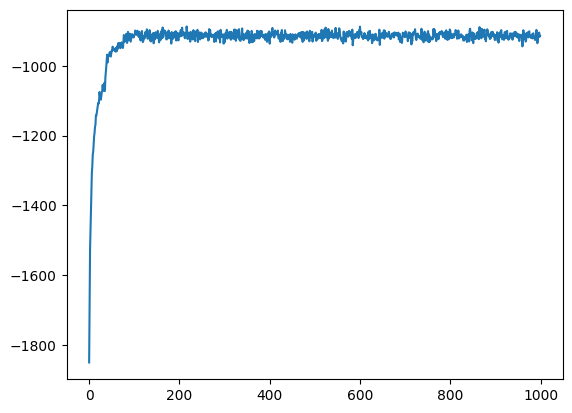

In [ ]:
plt.plot(scores)
plt.show()